In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
%matplotlib inline

In [13]:
mask = cv2.imread('data/stage1_train_/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masksmask.png', 0)

In [14]:
mask.shape

(256, 256)

In [28]:
test = np.zeros([4,3,128,128])
test[:,0,:,:].shape

(4, 128, 128)

In [6]:
mask1.shape

(3, 256, 256)

In [5]:
mask1 = np.zeros((3, *mask.shape))

In [23]:
#mask1 = np.zeros(3, (*mask.shape))
kernel = np.ones((4, 4), np.uint8)
seed = cv2.erode(mask[:,:,0], kernel, iterations=1)
border = mask[:,:,0] - seed
mask[:,:,1] = np.zeros(seed.shape)
mask[:,:,1] = seed
mask[:,:,2] = np.zeros(seed.shape)
mask[:,:,2] = border

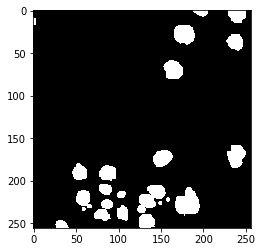

In [26]:
plt.imshow(mask[:,:,0], 'gray')

In [63]:
train_path = 'data/stage1_train/'

In [30]:
masks_path = 'data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks'

In [87]:
files = os.listdir(train_path)
kernel = np.ones((3,3),np.uint8)
for i in tqdm(range(len(files))):
    masks = os.path.join(files[i], 'masks')
    img_path = os.path.join(train_path, masks)
    mask = unite(img_path)
    seed = cv2.erode(mask, kernel,iterations = 1)
    border = mask - seed
    cv2.imwrite(img_path + 'mask.png', mask)
    cv2.imwrite(img_path + 'seed.png', seed)
    cv2.imwrite(img_path + 'border.png', border)


100%|██████████| 664/664 [00:43<00:00, 15.20it/s]


In [86]:
def unite(masks_path):
    one_true = None
    for image in os.listdir(masks_path):
        img_path = os.path.join(masks_path, image)
        img_mask = cv2.imread(img_path)
        if not hasattr(one_true, 'shape'):
            one_true = img_mask
            # print(img_path)
        else:
            one_true = one_true + img_mask
    return one_true

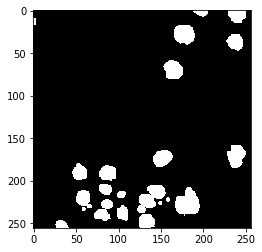

In [62]:
plt.imshow(one_true)

In [50]:
img = cv2.imread('data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png')

In [51]:
img.shape

(256, 256, 3)

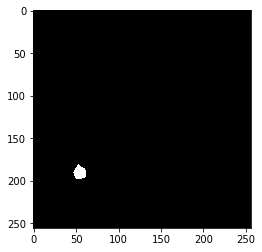

In [52]:
kernel = np.ones((3,3),np.uint8)
eroison = cv2.erode(img, kernel,iterations = 1)
border = img - eroison
plt.imshow(eroison)

(256, 256, 3)


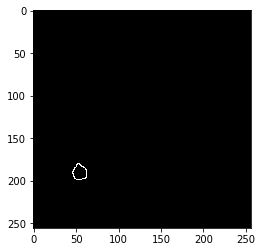

In [54]:
plt.imshow(border)
print(border.shape)

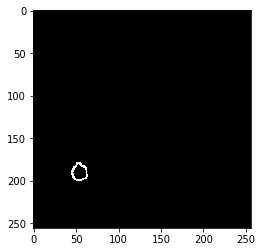

In [14]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

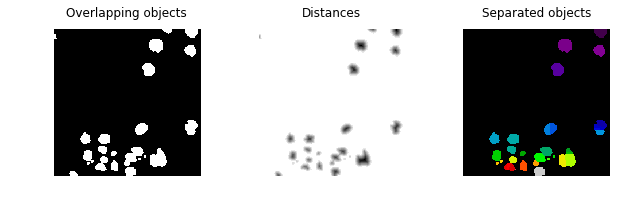

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
image = mask
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

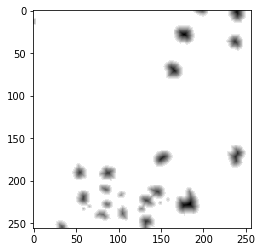

In [21]:
plt.imshow(-distance, 'gray')

In [27]:
labels.shape

(256, 256)